# 1. Installation of required libraries

In [27]:
import nltk
import spacy
import numpy as np
import pandas as pd

nltk.download('averaged_perceptron_tagger')

# vocabulory installation
nlp = spacy.load('en')
nlp

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Text Processing

In [28]:
# consider below sentence
sentence = "The little bear saw the fine fat trout in the brook"
sentence

'The little bear saw the fine fat trout in the brook'

In [29]:
# separate all the words/entities from sentence
words = sentence.split()

# randomly shuffle those words/entities
np.random.shuffle(words)
print(words)

['bear', 'little', 'the', 'in', 'fine', 'brook', 'fat', 'saw', 'The', 'trout', 'the']


# PoS (Parts of Speech) tagging

using NLTK

In [30]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10
0,The,little,bear,saw,the,fine,fat,trout,in,the,brook
1,DT,JJ,NN,VBD,DT,JJ,NN,NN,IN,DT,NN


using Spacy

In [31]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10
0,The,little,bear,saw,the,fine,fat,trout,in,the,brook
1,DT,JJ,NN,VBD,DT,JJ,JJ,NN,IN,DT,NN
2,DET,ADJ,NOUN,VERB,DET,ADJ,ADJ,NOUN,ADP,DET,NOUN


# Shallow Parsing

In [32]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
regparse = nltk.RegexpParser(grammar)
shallow_parsed_sent = regparse.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT little/JJ bear/NN)
  (VP saw/VBD)
  (NP the/DT fine/JJ fat/NN)
  (NP trout/NN)
  (PP in/IN)
  (NP the/DT brook/NN))


In [33]:
# Following installations are required for tree visualization only if you are using Google Colab 
!apt-get install -y xvfb 
# Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    
# create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    
# tell X clients to use our virtual DISPLAY :1.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [34]:
# Following installations are required for tree visualization only if you are using Google Colab 
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


# Visualize Shallow Parsed Trees

Using NLTK

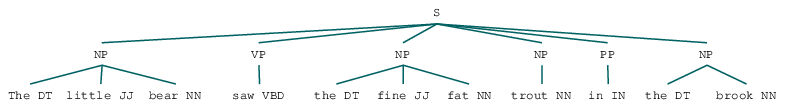

In [35]:
# visualize shallow parse tree
shallow_parsed_sent

Using SPaCy

In [36]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

# Illustration

## Brown Corpus

In [37]:
# download and load the Brown Corpus
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [38]:
# total categories
print('Total Categories:', len(brown.categories()))

Total Categories: 15


In [39]:
# print the categories
print(brown.categories()[:8])
print(brown.categories()[8:])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned']
['lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [40]:
# get sentences in natural form
sentences = brown.sents(categories='adventure')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] # viewing the first 5 sentences

['Dan Morgan told himself he would forget Ann Turner .',
 'He was well rid of her .',
 "He certainly didn't want a wife who was fickle as Ann .",
 "If he had married her , he'd have been asking for trouble .",
 'But all of this was rationalization .']

In [41]:
# tokenized sentences
brown.sents(categories='adventure')

[['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.'], ['He', 'was', 'well', 'rid', 'of', 'her', '.'], ...]

In [42]:
# POS tagged sentences
brown.tagged_sents(categories='adventure')

[[('Dan', 'NP'), ('Morgan', 'NP'), ('told', 'VBD'), ('himself', 'PPL'), ('he', 'PPS'), ('would', 'MD'), ('forget', 'VB'), ('Ann', 'NP'), ('Turner', 'NP'), ('.', '.')], [('He', 'PPS'), ('was', 'BEDZ'), ('well', 'RB'), ('rid', 'JJ'), ('of', 'IN'), ('her', 'PPO'), ('.', '.')], ...]

In [43]:
# get tagged words
tagged_words = brown.tagged_words(categories='adventure')
print(tagged_words)

[('Dan', 'NP'), ('Morgan', 'NP'), ('told', 'VBD'), ...]


In [44]:
# get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP', 'NN'])]

nouns[0:10] # view the first 10 nouns

[('Dan', 'NP'),
 ('Morgan', 'NP'),
 ('Ann', 'NP'),
 ('Turner', 'NP'),
 ('wife', 'NN'),
 ('Ann', 'NP'),
 ('trouble', 'NN'),
 ('rationalization', 'NN'),
 ('middle', 'NN'),
 ('night', 'NN')]

In [45]:
# build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

# view top 10 occuring nouns
nouns_freq.most_common(10)

[('man', 165),
 ('time', 127),
 ('eyes', 90),
 ('men', 81),
 ('face', 72),
 ('head', 68),
 ('door', 67),
 ('hand', 64),
 ('way', 62),
 ('house', 60)]

**Done!!!**